   # Laborator 6

## Reprezentarea datelor dintr-un Dataframe

Incarcati un set de date numerice, multivariat dintr-unul din depozitele de date mentionate in cursul 5. Folosind metodele prezentate la [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), [Pandas Dataframe: Plot Examples with Matplotlib and Pyplot](http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot), reprezentati valorile pe coloane. Comentati (in text) cele observate pe baza reprezentarilor (de exemplu: exista valori outlier, valorile sunt concentrate intr-un anumit interval, vlorile sunt grupate in catve locatii etc).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
glass = pd.read_csv('glass.data', names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
   10. Fe: Iron
   11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


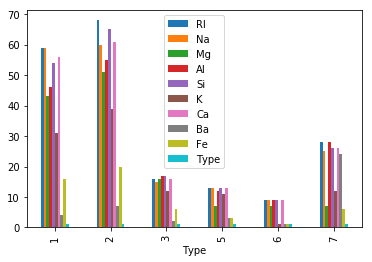

In [5]:
glass.groupby('Type').nunique().plot.bar()

"""Din acest plot se pot observa distributia parametrilor(elemente chimice) pe fiecare tip de sticla"""

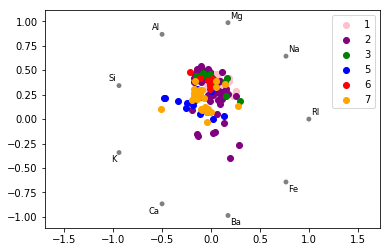

In [6]:
colors = ['pink', 'purple', 'green', 'blue', 'red', 'orange', 'yellow']
pd.plotting.radviz(glass, 'Type', color=colors)

"""In aceasta reprezentare se observa ca anumite tipuri de sticla au o componenta chimica diferita"""

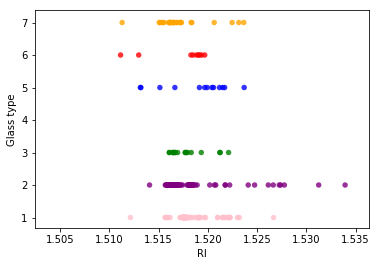

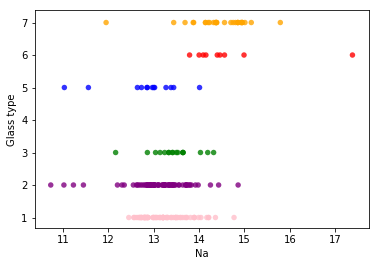

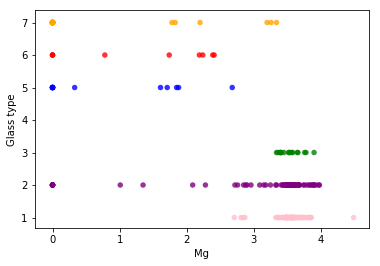

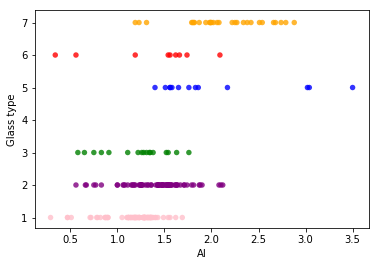

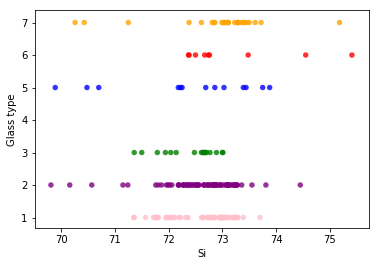

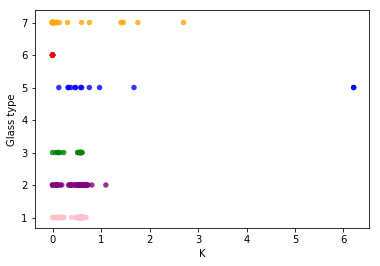

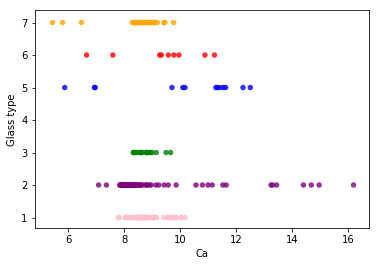

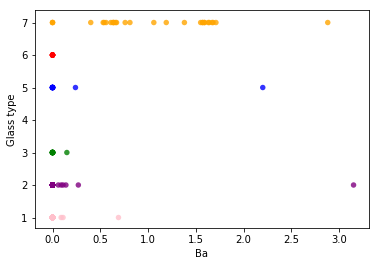

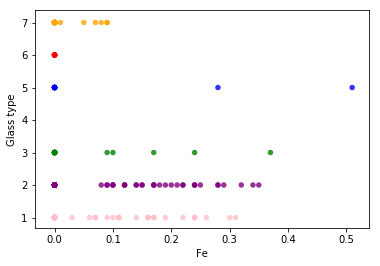

In [7]:
grouped_df = glass.groupby('Type')

colors = ['pink', 'purple', 'green', 'blue', 'red', 'orange', 'yellow']
groups = ['1 building_windows_float_processed',
      '2 building_windows_non_float_processed',
      '3 vehicle_windows_float_processed',
      '4 vehicle_windows_non_float_processed',
      '5 containers',
      '6 tableware',
      '7 headlamps']

for name in glass.columns.values[:-1]:
    for (key, item), color, group in zip(grouped_df, colors, groups):
        x, y = grouped_df.get_group(key)[name], grouped_df.get_group(key)['Type']
        plt.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    plt.xlabel(name)
    plt.ylabel('Glass type')
#     plt.legend(loc=2)
    plt.show()

    """ In aceste ploturi sunt reprezentate tipurile de sticla in funcie de elementul chimic pe care il contin.
    Se observa ca anumite tipuri de stilca au in componenta un material care depaseste valoarea generala pe care il au 
    celelalte tipuri"""

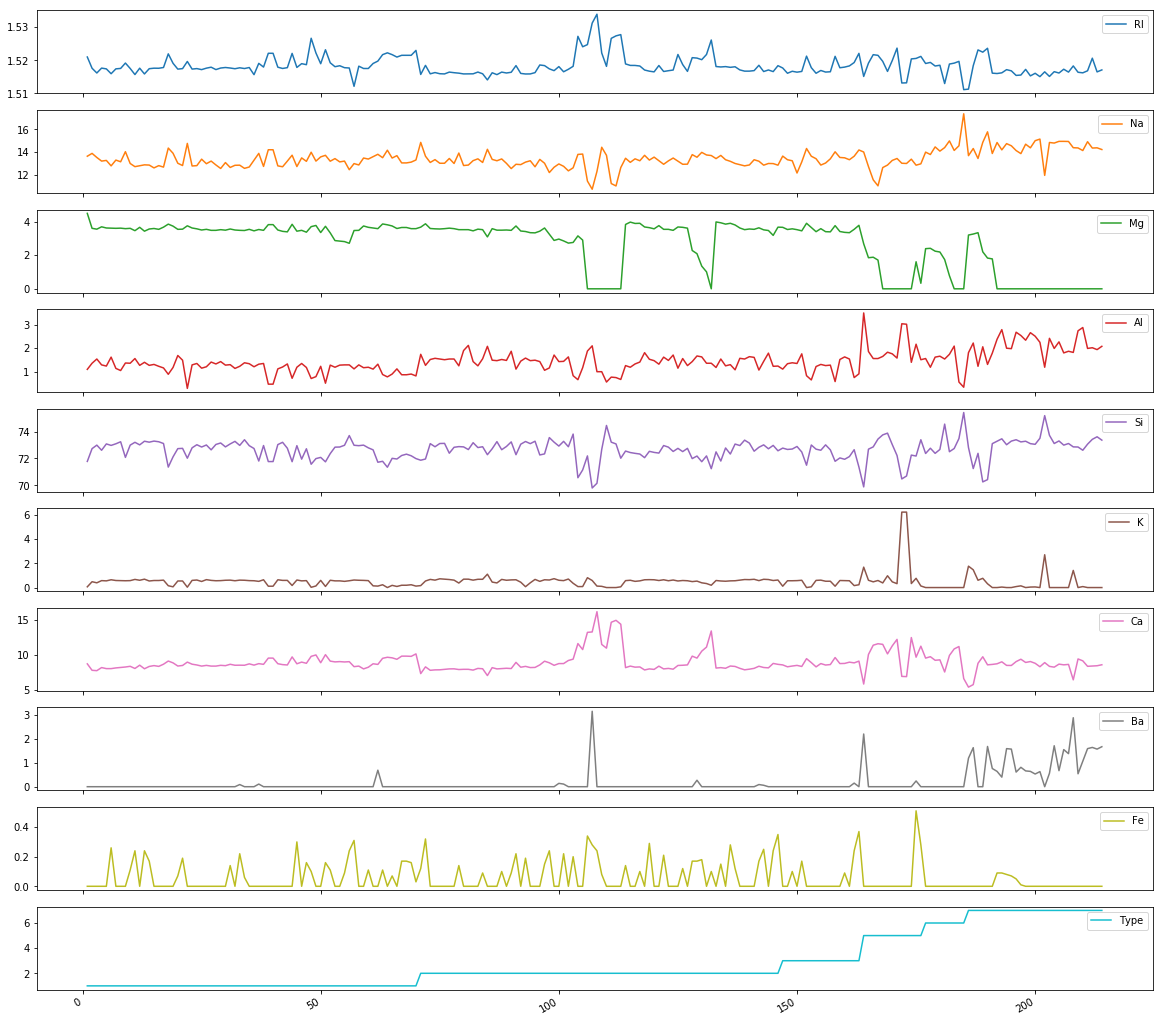

In [8]:
glass.plot(subplots=True, figsize=(20, 20))
plt.show()

"""Pe axa X a acestui subplot se poate observa distributia elementelor chimice pe tipurile de 
sticla si distributia independenta a elementelor"""

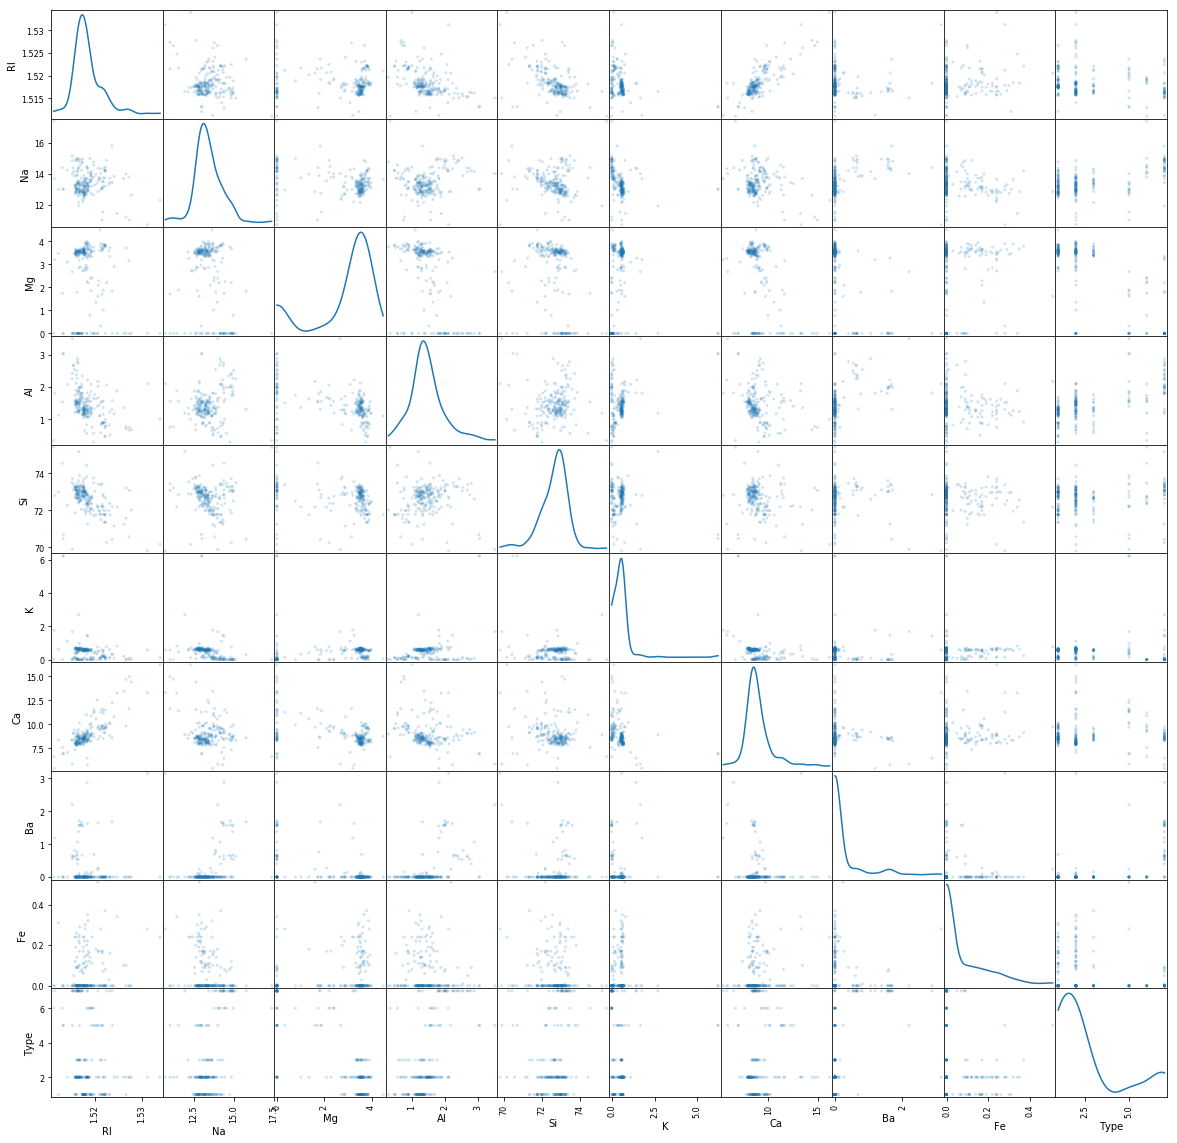

In [9]:
pd.plotting.scatter_matrix(glass, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

''' Aici sunt afisate toate scateruruile formate din fiecare atribut si obesrvam
ca exista multe legaturi intre atributele din dataframe.'''